# Exercise 1: Bayesian Inference for Poisson model

## a)

In [1]:
library(tidyverse)
theme_set(theme_bw())

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


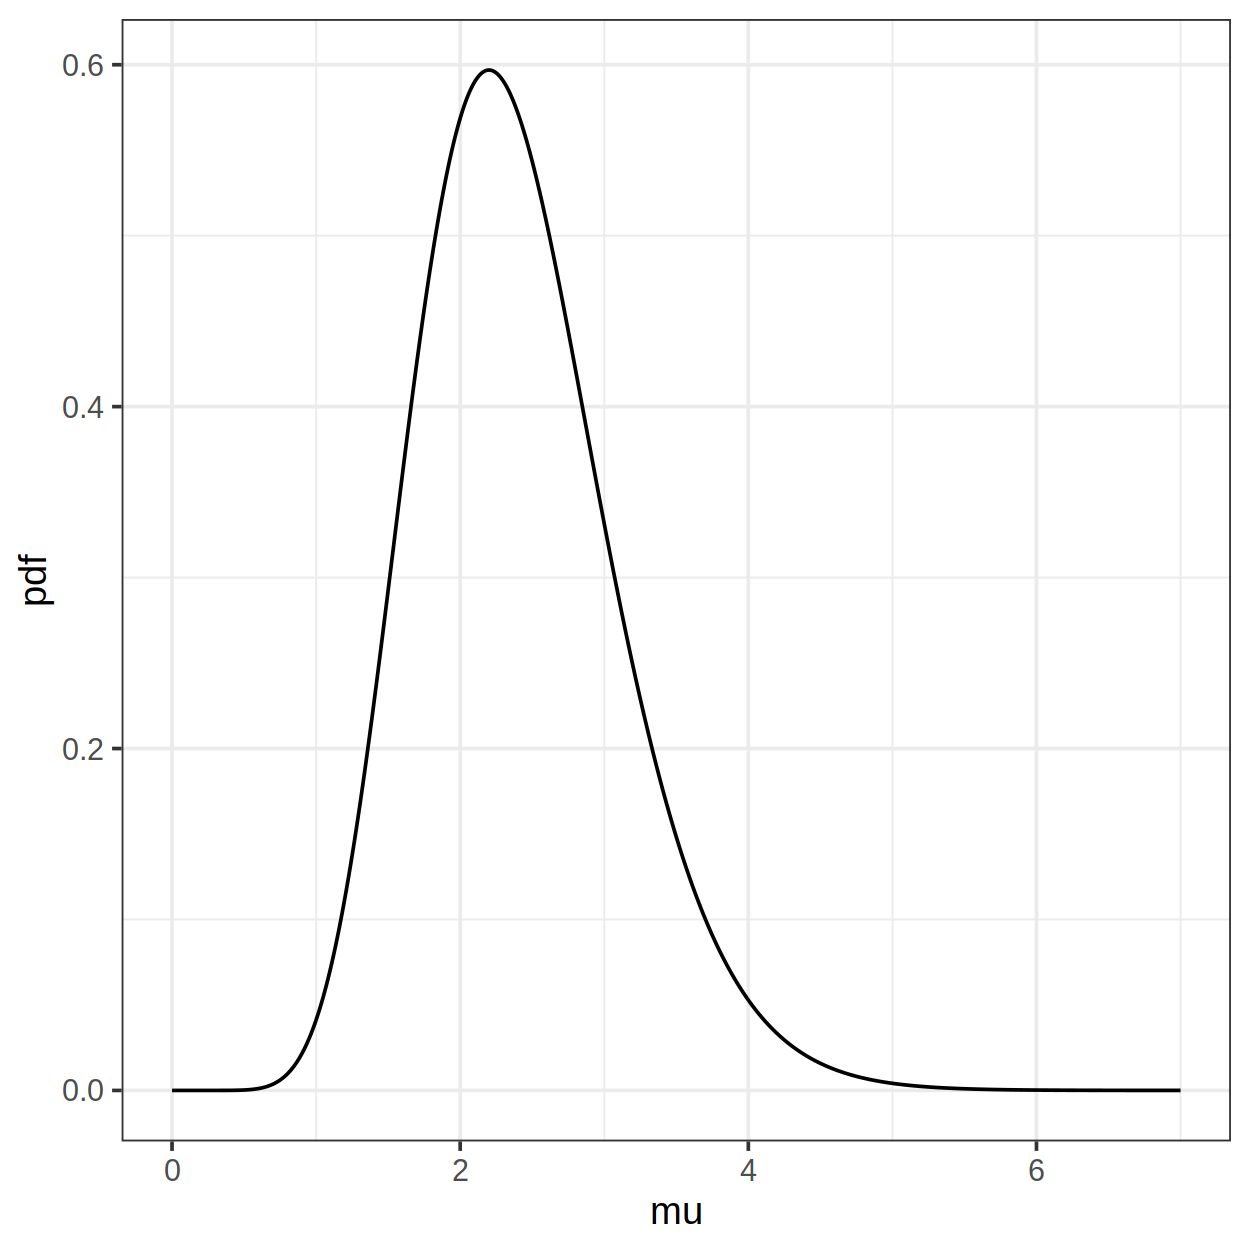

In [2]:
x <- c(3, 0, 1, 5, 2)
a <- sum(x) + 1
lam <- length(x)

nums <- seq(0, 7, length.out=1e3)
post <- dgamma(nums, a, lam)
mu <- data.frame(n=nums) |> mutate(unif=dunif(n, 0, 7), gamma=post)

options(repr.plot.width=5, repr.plot.height=5, repr.plot.res=250)
ggplot(mu, aes(x=n)) + geom_line(aes(y=gamma)) + labs(x='mu', y='pdf')

In [3]:
compute <- function(a, lam){cat('Analytical mean:', (a / lam -> mean),
    '\nAnalytical variance:', a / lam ^ 2,
    '\nAnalytical median:', qgamma(.5, a, lam),
    '\nNumerical mean:', sum(nums*post) / sum(post),
    '\nNumerical variance:', sum(post * nums^2) / sum(post) - mean^2,
    '\nNumerical median:', median(rgamma(1e4, a, lam))
)}

compute(a, lam)

Analytical mean: 2.4 
Analytical variance: 0.48 
Analytical median: 2.333673 
Numerical mean: 2.399989 
Numerical variance: 0.4798987 
Numerical median: 2.340154

## b)

Analytical mean: 2.142857 
Analytical variance: 0.3061224 
Analytical median: 2.095431 
Numerical mean: 2.142857 
Numerical variance: 0.3061223 
Numerical median: 2.10372

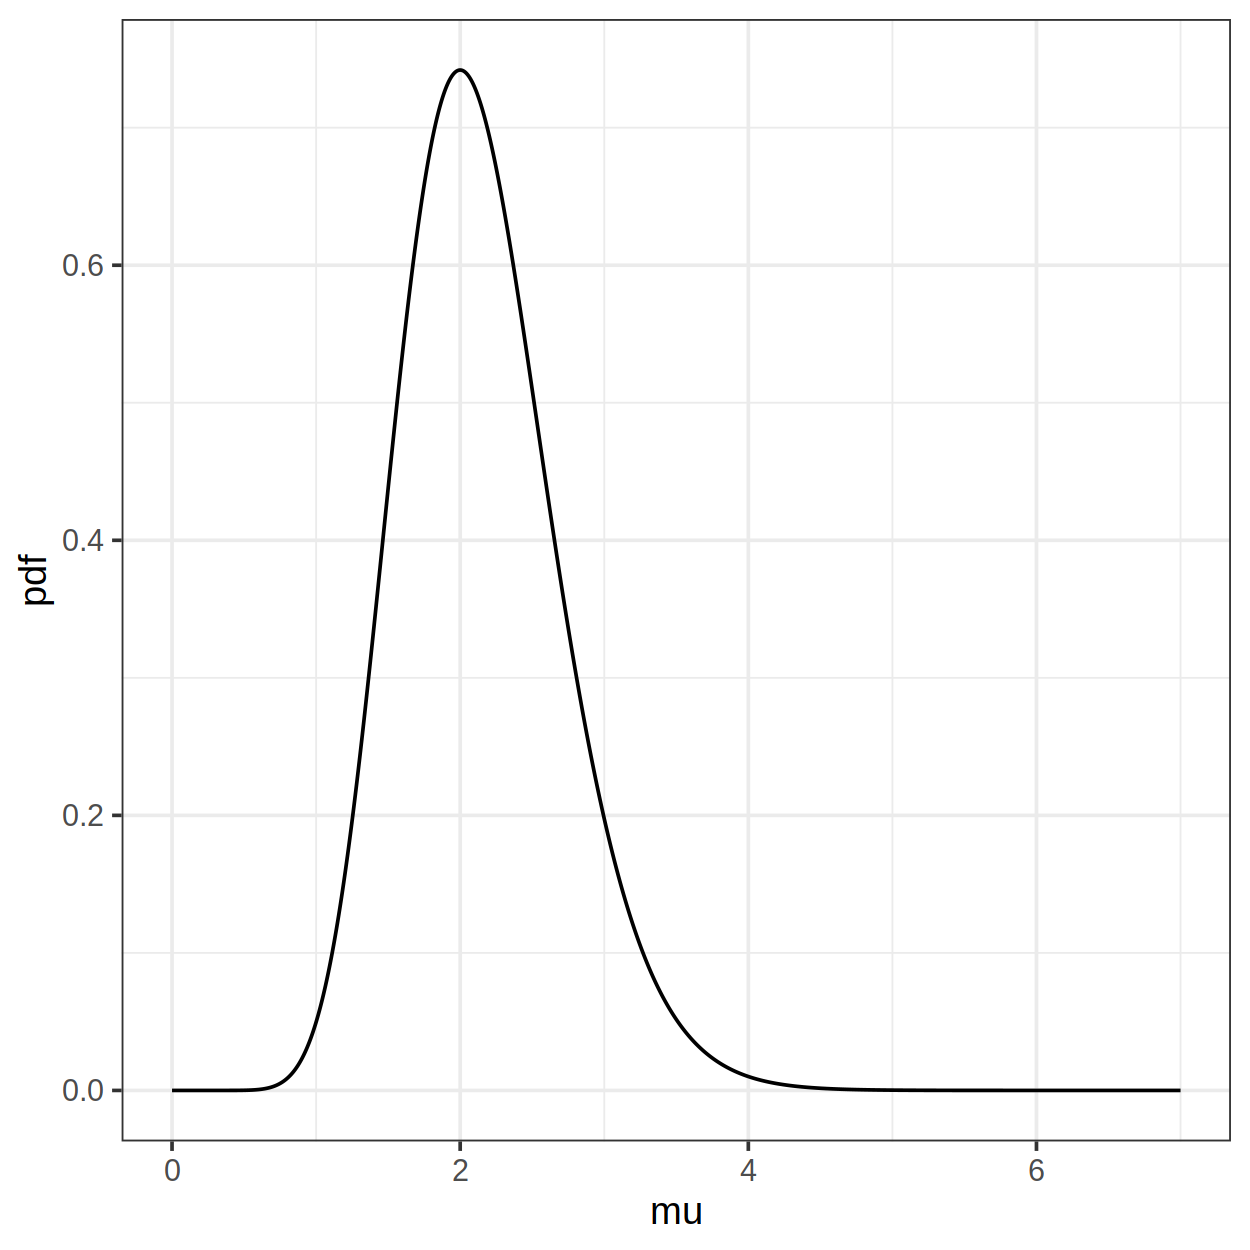

In [4]:
mean <- 2
a2 <- mean^2 + sum(x)
lam2 <- mean + length(x)

post <- dgamma(nums, a2, lam2)
mu <- data.frame(n=nums) |> mutate(unif=dunif(n, 0, 7), gamma=post)

ggplot(mu, aes(x=n)) + geom_line(aes(y=gamma))  + labs(x='mu', y='pdf')
compute(a2, lam2)

## c)

In [5]:
cat('CI gamma:', qgamma(c(.025, .975), a2, lam2), '\nCI uni:',qgamma(c(.025, .975), a, lam))

mean <- a2 / lam2
std <- sqrt(a2 / lam2^2)
cat('\nCI norm:', qnorm(c(.025, .975), mean, std))

CI gamma: 1.199341 3.35566 
CI uni: 1.240115 3.936408
CI norm: 1.058442 3.227273

# Exercise 2: Efficiency using Bayesian approach

In [6]:
rm(list=ls())

## a/b)

In [7]:
b.mean <- function(a, b){a / (a + b)}
b.std <- function(a, b){sqrt(a * b / ((a + b)^2*(a + b + 1)))}

Mean unif.: 0.5909091 
Std unif.: 0.1025195 
Mean Jeffrey: 0.5952381 
Std Jeffrey: 0.1046487

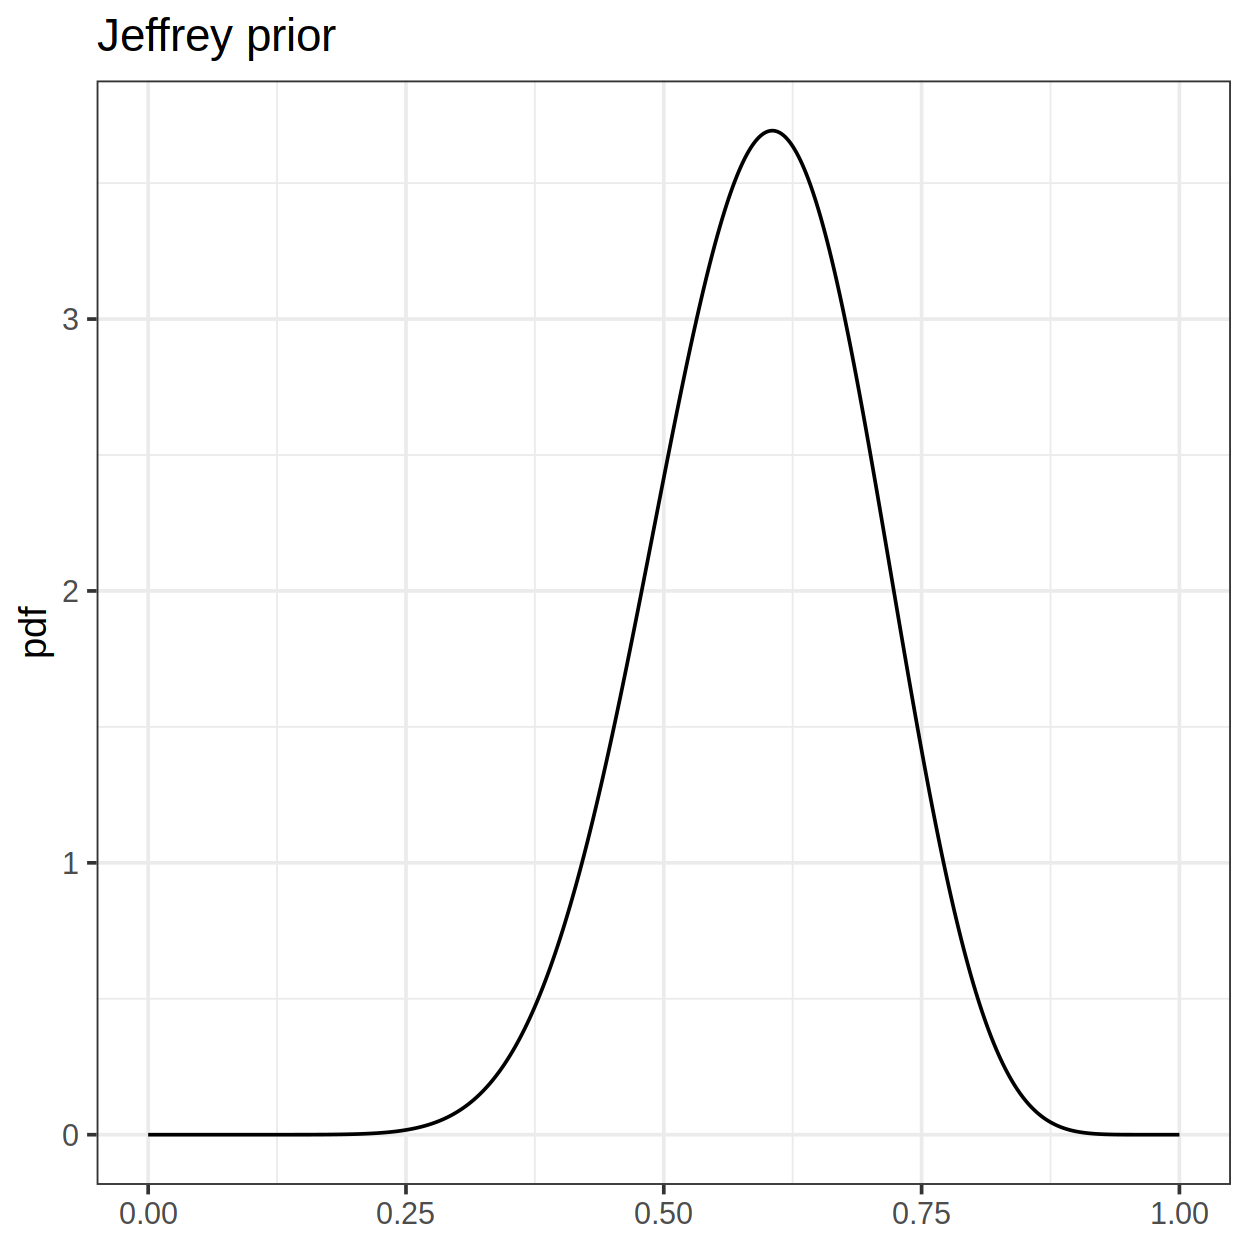

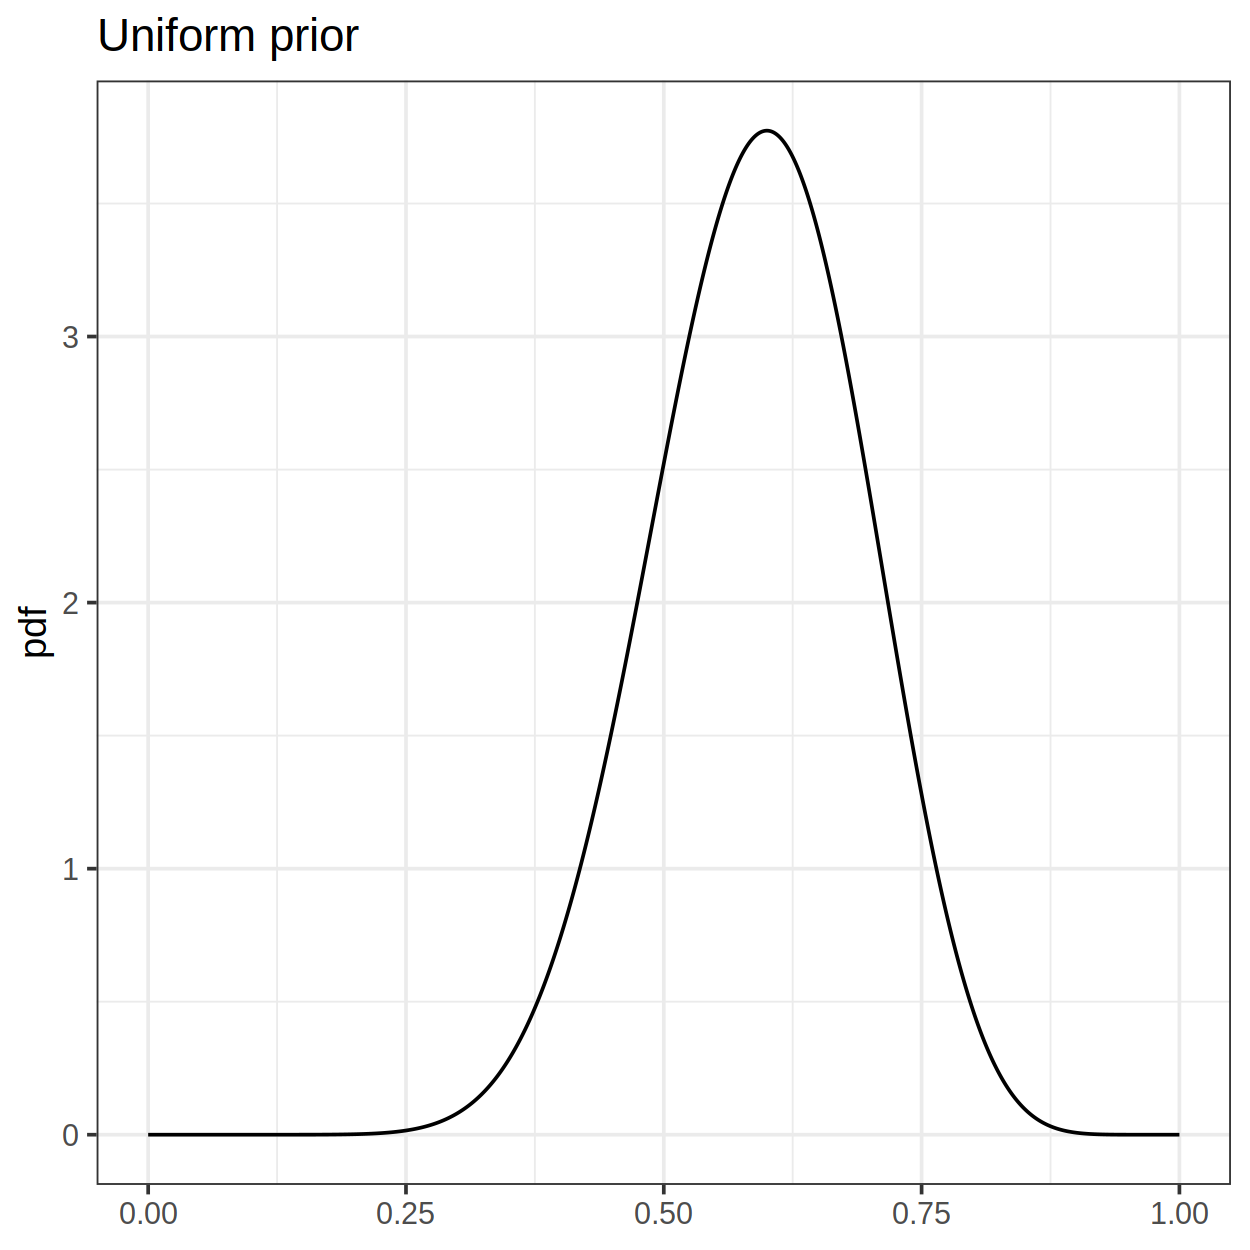

In [8]:
n <- 20
r <- 12
uni.a <- 1 + r
uni.b <- 1 + n - r
J.a <- .5 + r
J.b <- .5 + n - r
cat('Mean unif.:', b.mean(uni.a, uni.b),
   '\nStd unif.:', b.std(uni.a, uni.b),
   '\nMean Jeffrey:', b.mean(J.a, J.b),
   '\nStd Jeffrey:', b.std(J.a, J.b))

nums <- seq(0, 1, length.out=1e4)
uni.post <- dbeta(nums, uni.a, uni.b)
J.post <- dbeta(nums, J.a, J.b)

plot.frame <- data.frame(n=nums, post=J.post)
ggplot(plot.frame, aes(x=n, y=post)) + geom_line() + labs(title='Jeffrey prior', x=NULL, y='pdf')

plot.frame <- data.frame(n=nums, post=uni.post)
ggplot(plot.frame, aes(x=n, y=post)) + geom_line() + labs(title='Uniform prior', x=NULL, y='pdf')


## c)

Mean unif.: 0.9166667 
Std unif.: 0.07665552

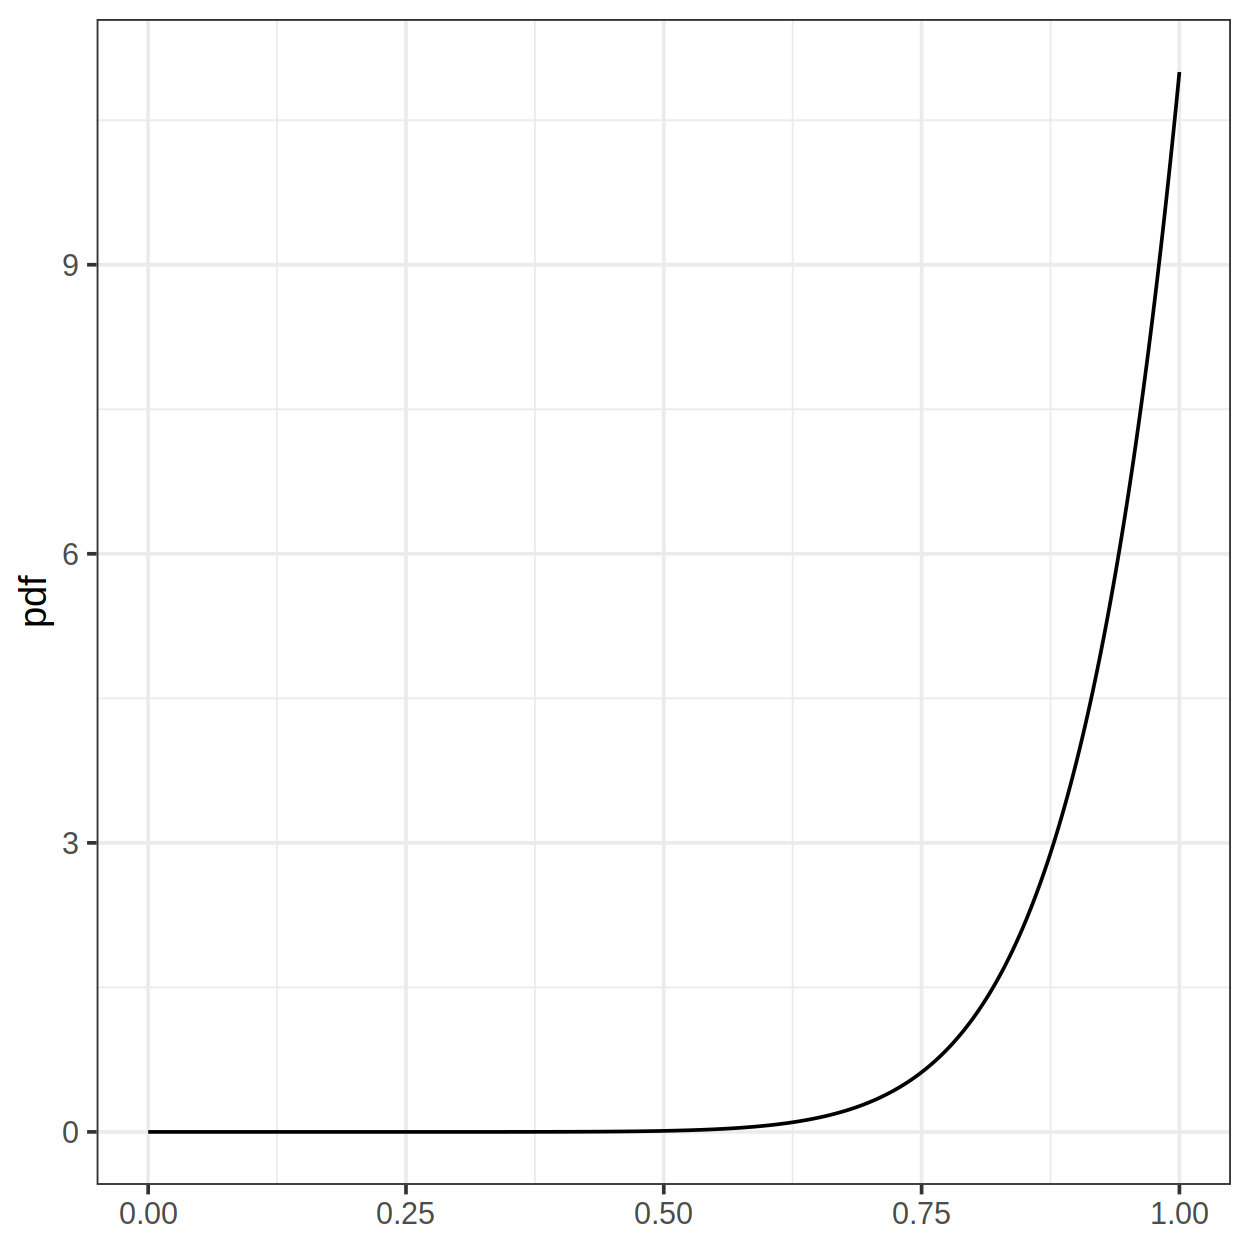

In [9]:
n <- 10
r <- 10
uni.a <- 1 + r
uni.b <- 1 + n - r
cat('Mean unif.:', b.mean(uni.a, uni.b),
   '\nStd unif.:', b.std(uni.a, uni.b))

nums <- seq(0, 1, length.out=1e4)
uni.post <- dbeta(nums, uni.a, uni.b)

plot.frame <- data.frame(n=nums, post=uni.post)
ggplot(plot.frame, aes(x=n, y=post)) + geom_line() + labs(x=NULL, y='pdf')



## d)

Mean new: 0.71875 
Std new: 0.07826692

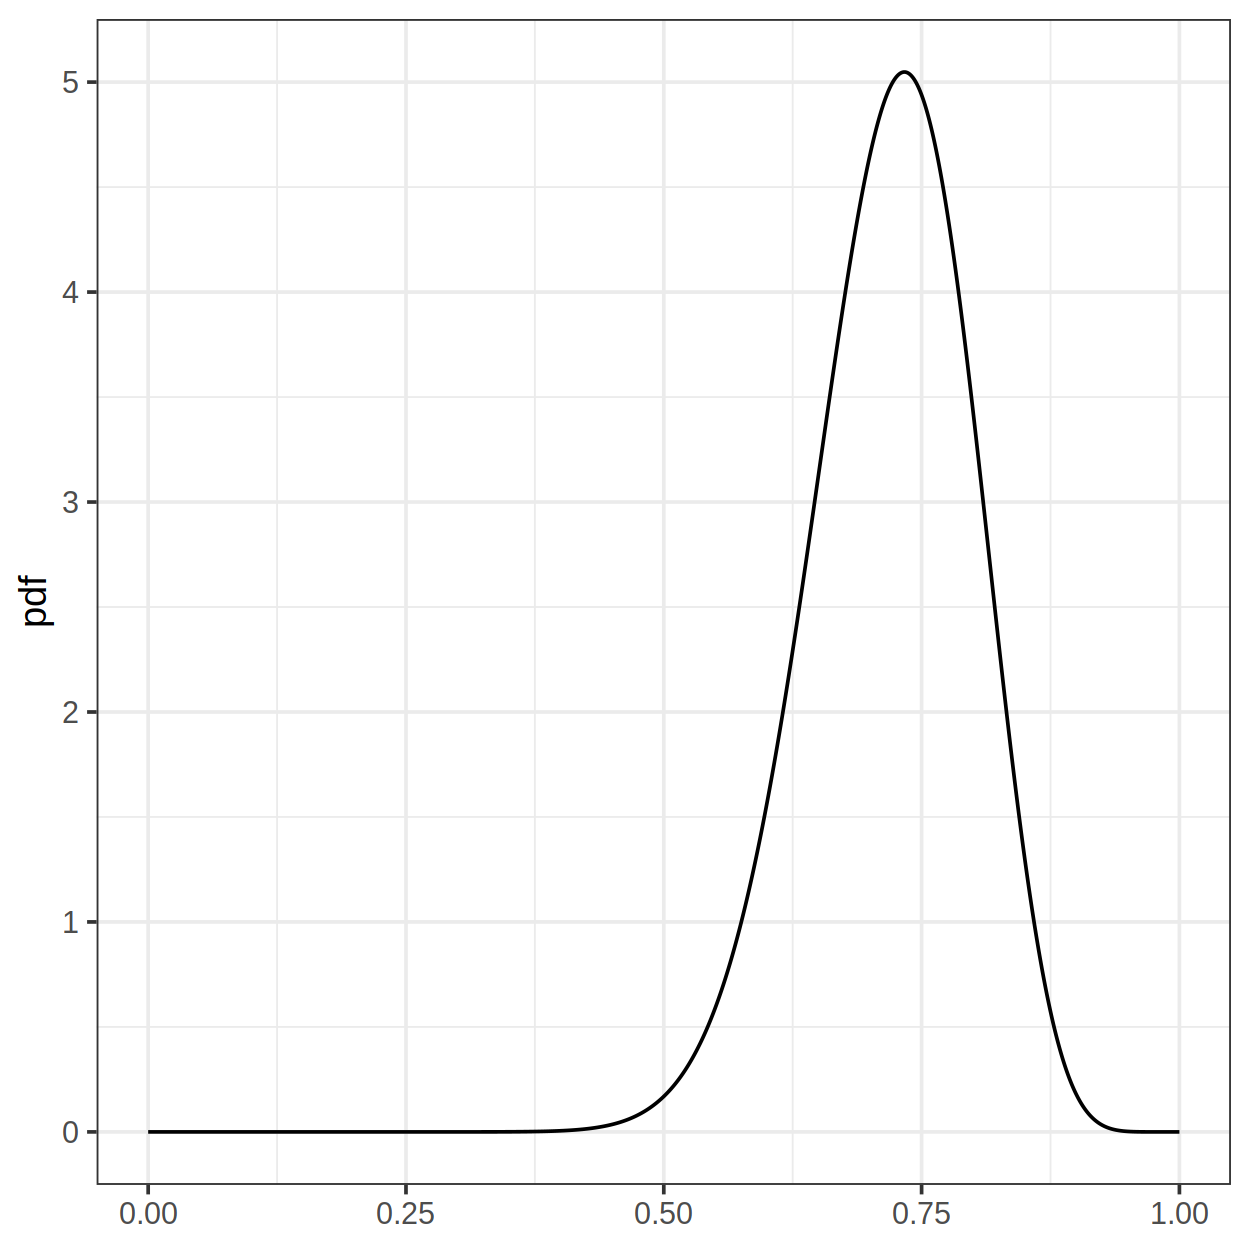

In [10]:
n.old <- 20
r.old <- 12
new.a <- uni.a + r.old
new.b <- uni.b + n.old - r.old
cat('Mean new:', b.mean(new.a, new.b),
   '\nStd new:', b.std(new.a, new.b))

nums <- seq(0, 1, length.out=1e4)
new.post <- dbeta(nums, new.a, new.b)

plot.frame <- data.frame(n=nums, post=new.post)
ggplot(plot.frame, aes(x=n, y=post)) + geom_line() + labs(x=NULL, y='pdf')

## e)

In [11]:
qbeta(c(.025, .975), new.a, new.b)

[1] 0.5538661 0.8577715

# Exercise 3: Bayesian Inference for Binomial model

In [12]:
rm(list = ls())

## a)

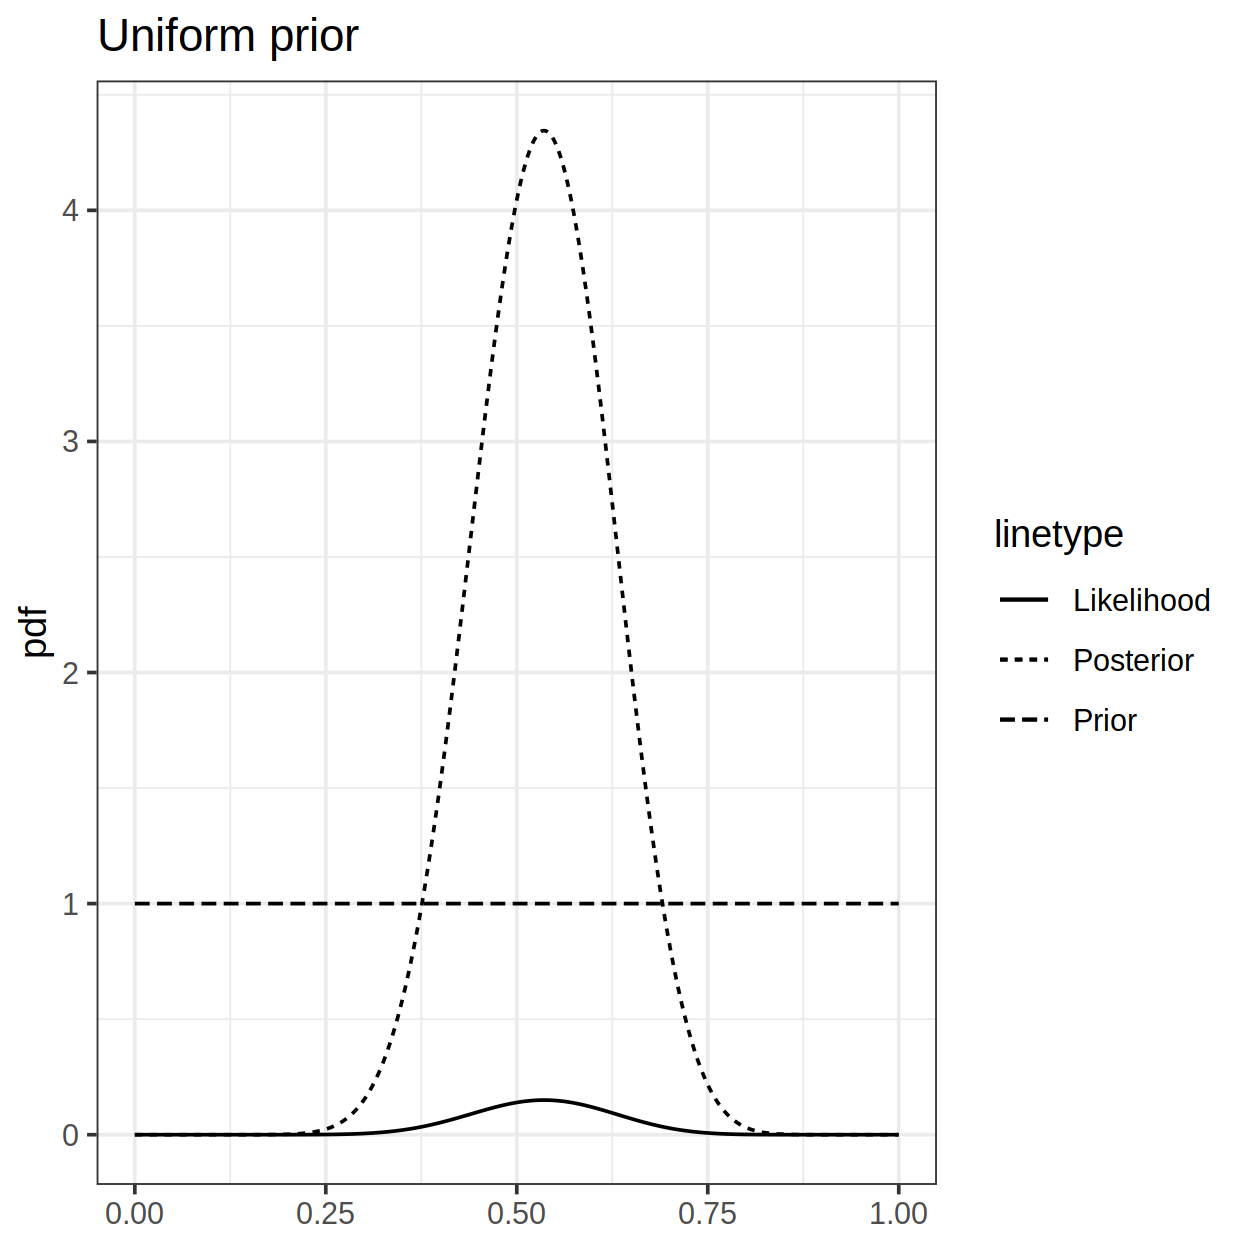

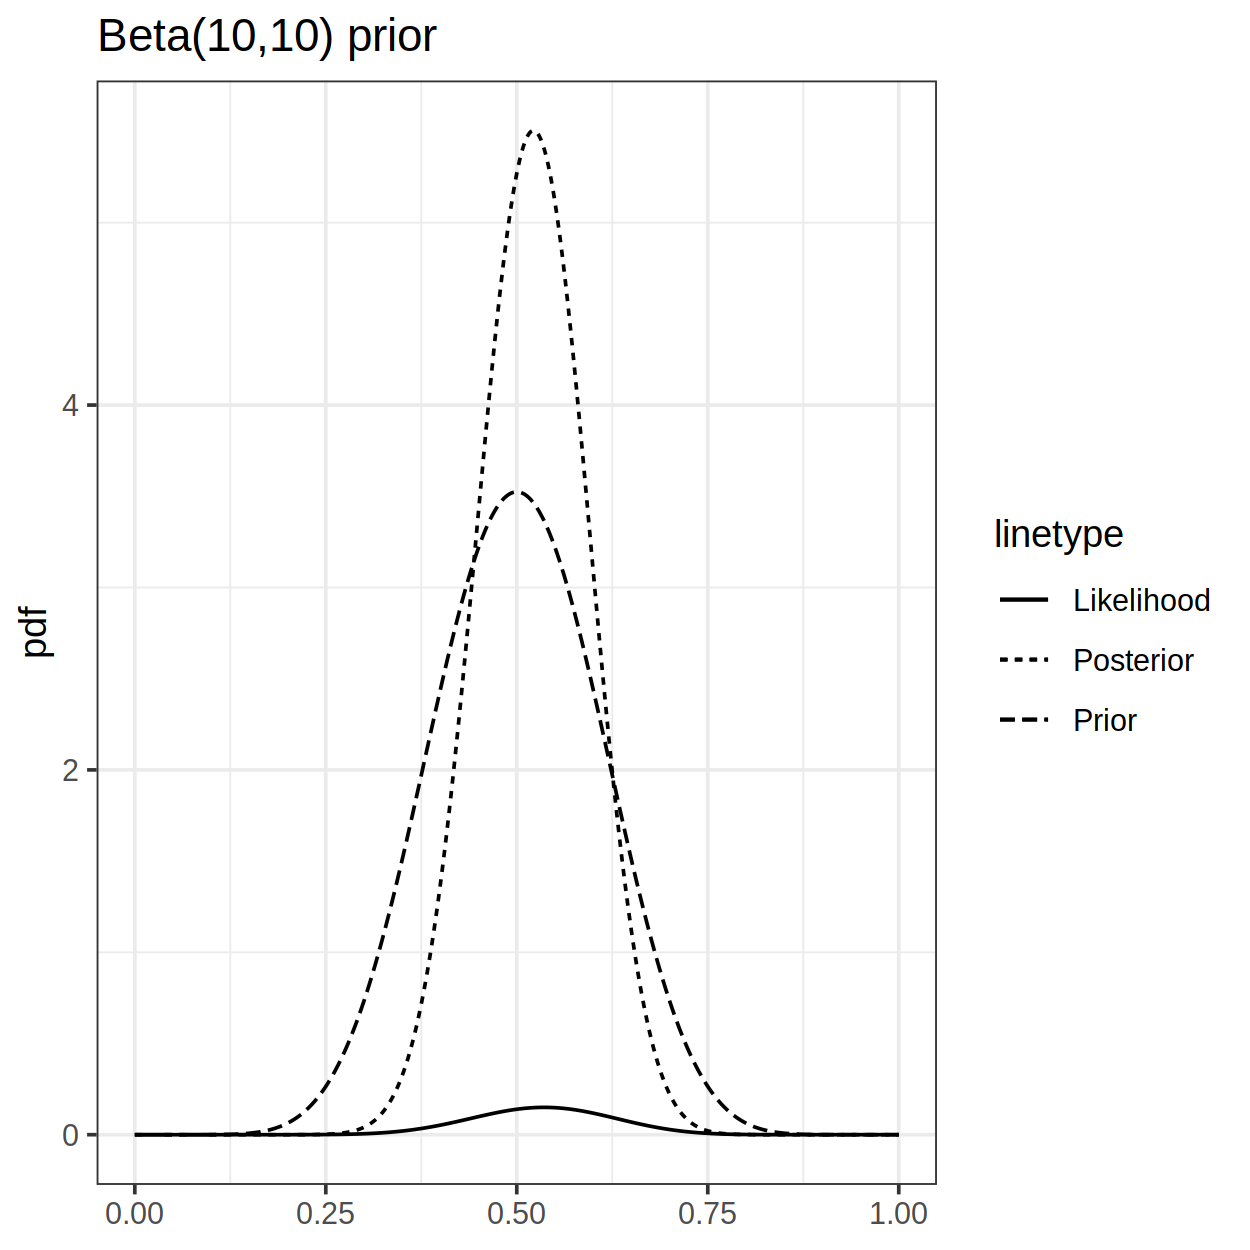

In [13]:
n <- 28
H <- F; tosses <- c(T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H); Ts <- sum(tosses)
nums <- seq(0, 1, length.out=1e4)


prior <- dunif(nums)
a <- 1 + Ts; b <- 1 + n - Ts
post <- dbeta(nums, a, b)
like <- dbinom(Ts, n, nums)
mode.uni <- (a - 1) / (a + b - 2)
ci.uni <- qbeta(c(.025, 0.975), a, b)

plot.frame <- data.frame(nums, prior, post, like)
ggplot(plot.frame, aes(x=nums)) + geom_line(aes(y=prior, lty='Prior')) + geom_line(aes(y=post, lty='Posterior')) + geom_line(aes(y=like, lty='Likelihood')) + 
    labs(title='Uniform prior', x=NULL, y='pdf')


prior <- dbeta(nums, 10, 10)
a <- 10 + Ts; b <- 10 + n - Ts
post <- dbeta(nums, a, b)
like <- dbinom(Ts, n, nums)
mode.beta <- (a - 1) / (a + b - 2)
ci.beta <- qbeta(c(.025, 0.975), a, b)


plot.frame <- data.frame(nums, prior, post, like)
ggplot(plot.frame, aes(x=nums)) + geom_line(aes(y=prior, lty='Prior')) + geom_line(aes(y=post, lty='Posterior')) + geom_line(aes(y=like, lty='Likelihood')) +
    labs(title='Beta(10,10) prior', x=NULL, y='pdf')


## b)

Expected values, and $95\%$ confidence interval

In [14]:
cat('Uniform\nExp. val.:', mode.uni, '\nCI:', ci.uni, '\n\nBeta\nExp. val.:', mode.beta, '\nCI:', ci.beta)

Uniform
Exp. val.: 0.5357143 
CI: 0.3569387 0.7055144 

Beta
Exp. val.: 0.5217391 
CI: 0.3807779 0.659243

## c/d)

Uniform
Exp. val.: 0.5357143 
CI: 0.3569387 0.7055144 

Beta
Exp. val.: 0.5217391 
CI: 0.3807779 0.659243

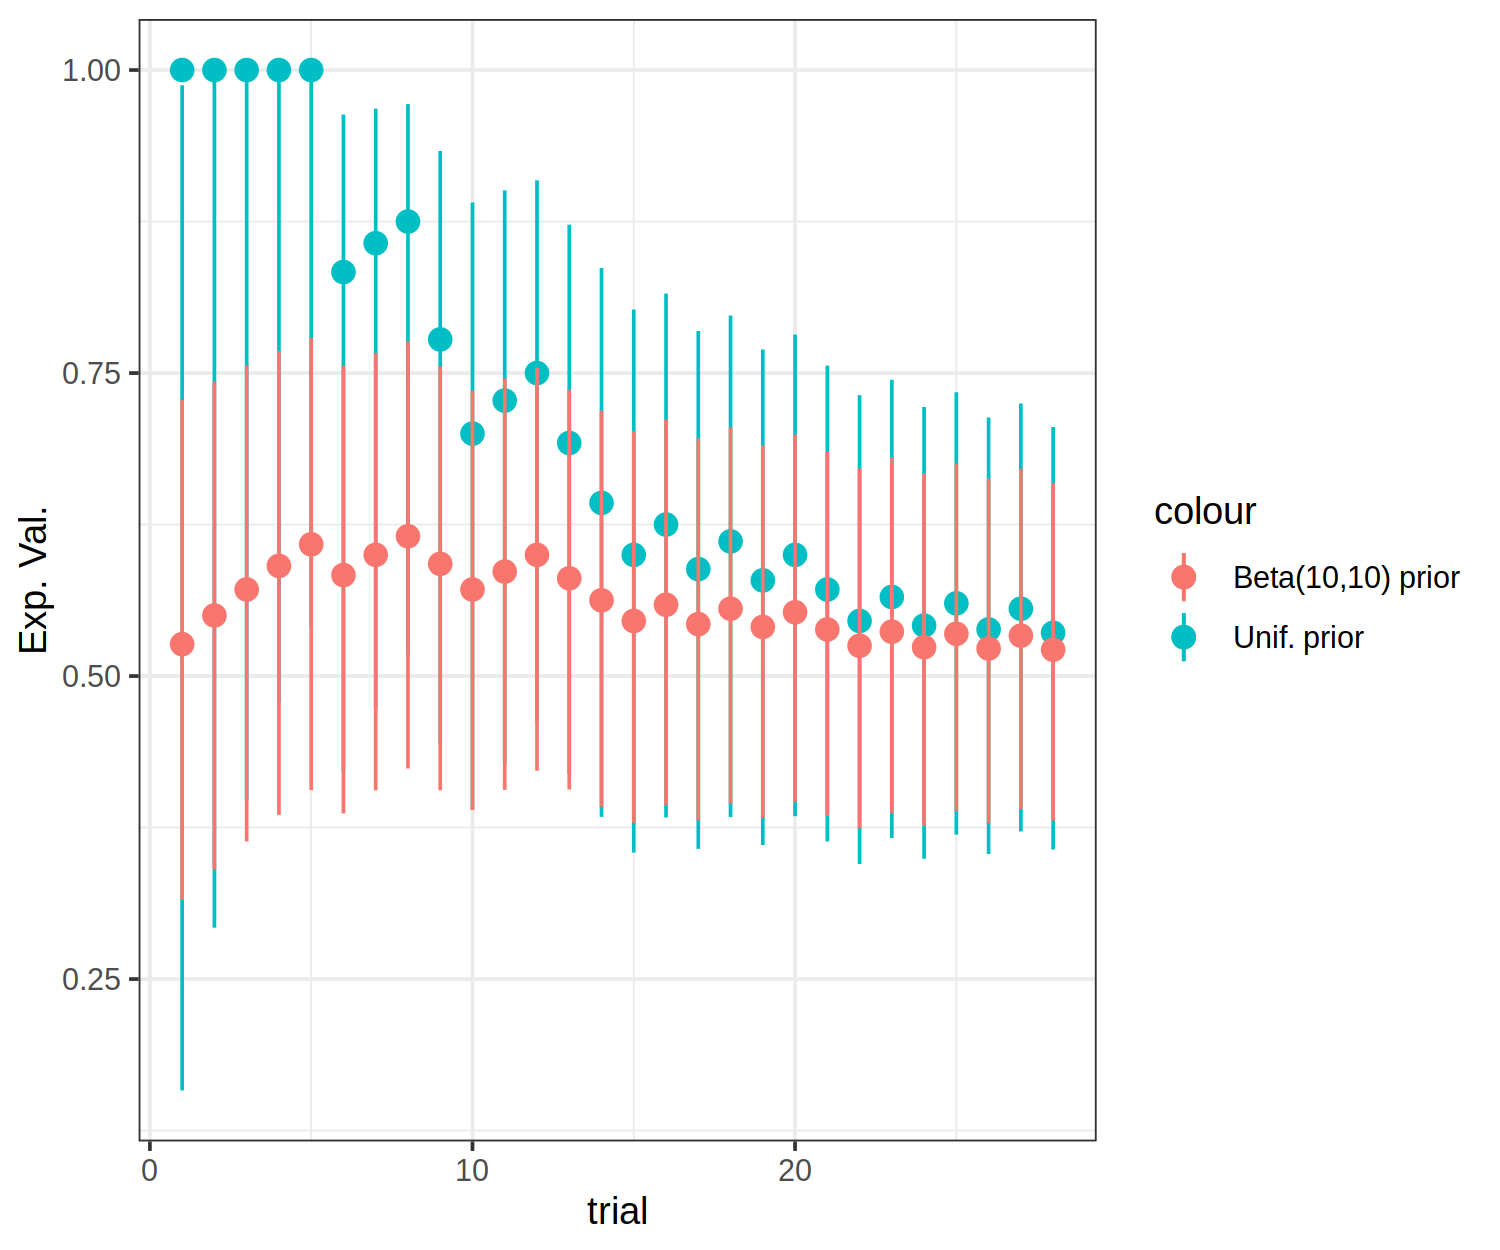

In [15]:
tib <- tibble(trial=1:28, cumTs=cumsum(tosses), 
              a.uni=1 + cumTs, b.uni=1 + trial - cumTs, mode.uni=(a.uni - 1) / (a.uni + b.uni - 2), cinf.uni=qbeta(.025, a.uni, b.uni), cmax.uni=qbeta(0.975, a.uni, b.uni),
              a.beta=10 + cumTs, b.beta=10 + trial - cumTs, mode.beta=(a.beta - 1) / (a.beta + b.beta - 2), cinf.beta=qbeta(.025, a.beta, b.beta), cmax.beta=qbeta(0.975, a.beta, b.beta))

options(repr.plot.width=6, repr.plot.height=5, repr.plot.res=250)
last <- tail(tib, 1)
cat('Uniform\nExp. val.:', last$mode.uni, '\nCI:', last$cinf.uni, last$cmax.uni, '\n\nBeta\nExp. val.:', last$mode.beta, '\nCI:', last$cinf.beta, last$cmax.beta)
ggplot(tib, aes(x=trial)) + geom_pointrange(aes(y=mode.uni, ymin=cinf.uni, ymax=cmax.uni, color='Unif. prior')) + geom_pointrange(aes(y=mode.beta, ymin=cinf.beta, ymax=cmax.beta, color='Beta(10,10) prior')) +
    labs(y='Exp. Val.')

Mode and CI values are the same as in the non-sequential case.

#  Exercise 4: Poll

In [16]:
rm(list=ls())

In [17]:
n <- 200
r <- c(57, 31, 45, 67)
inf <- (100 - 68) / 200
sup <- 1 - inf
a <- numeric(4); b <- numeric(4)
for (i in seq_along(r)) {
    a[i] <- 1 + r[i]
    b[i] <- 1 + n - r[i]
    exp_val <- (a[i] - 1) / (a[i] + b[i] -2)
    cinf <- qbeta(inf, a[i], b[i])
    csup <- qbeta(sup, a[i], b[i])
    cat('Exp. val.:', exp_val*100, '\nCI:', cinf*100, csup*100, '\n\n')
}

Exp. val.: 28.5 
CI: 25.54901 31.87561 

Exp. val.: 15.5 
CI: 13.2933 18.38813 

Exp. val.: 22.5 
CI: 19.84137 25.70177 

Exp. val.: 33.5 
CI: 30.35773 36.96814 



In [18]:
n2 <- 100
r2 <- c(32, 14, 26, 28)
inf <- (100 - 68) / 200
sup <- 1 - inf
for (i in seq_along(r2)) {
    a2 <- a[i] + r2[i]
    b2 <- b[i] + n2 - r2[i]
    exp_val <- (a2 - 1) / (a2 + b2 -2)
    cinf <- qbeta(inf, a2, b2)
    csup <- qbeta(sup, a2, b2)
    cat('Exp. val.:', exp_val*100, '\nCI:', cinf*100, csup*100, '\n\n')
}

Exp. val.: 29.66667 
CI: 27.18466 32.41718 

Exp. val.: 15 
CI: 13.17912 17.2831 

Exp. val.: 23.66667 
CI: 21.40415 26.27693 

Exp. val.: 31.66667 
CI: 29.12392 34.45151 

